In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Data Exploration

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/AI/heart.csv', na_values={'RestingBP': 0, 'Cholesterol': 0})

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138.0,175.0,0,Normal,173,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,917.000000,746.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.999749,59.153524,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Data Analysis and Visualization

In [9]:
px.histogram(df,x='Age',color='HeartDisease').update_layout(title='Age Distribution')

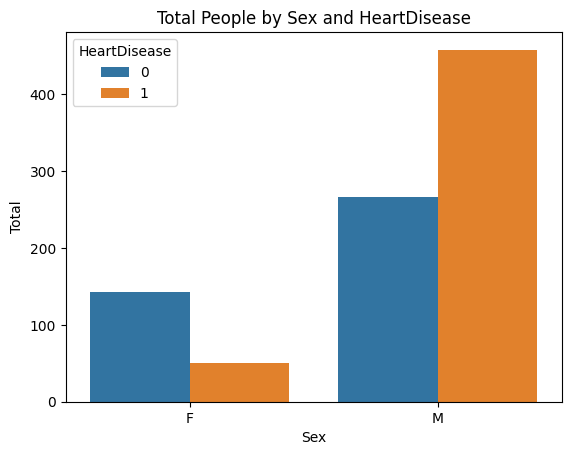

In [10]:
df_sex_heart = df.groupby(['Sex','HeartDisease'])['Sex'].count().reset_index(name='Total')
sns.barplot(data=df_sex_heart,x='Sex',y='Total',hue='HeartDisease')
plt.title('Total People by Sex and HeartDisease');

In [11]:
px.pie(values=df['ChestPainType'].value_counts(),names =df['ChestPainType'].value_counts().index).update_layout(title='Chest Pain Type')

In [12]:
px.histogram(data_frame=df,x='RestingBP',color='HeartDisease',nbins=100).update_layout(title='RestingBP Distribution')

In [13]:
px.histogram(data_frame=df,x='Cholesterol',color='HeartDisease',nbins=100).update_layout(title='Cholestrol Distribution')

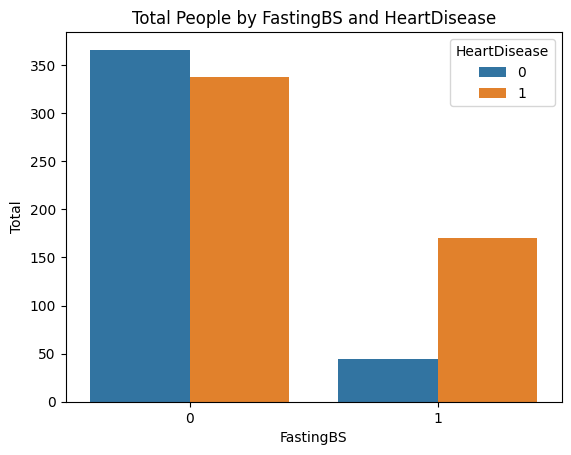

In [14]:
df_fasting_heart = df.groupby(['FastingBS','HeartDisease'])['FastingBS'].count().reset_index(name='Total')
sns.barplot(data=df_fasting_heart,x='FastingBS',y='Total',hue='HeartDisease')
plt.title('Total People by FastingBS and HeartDisease');

In [15]:
px.pie(values=df['RestingECG'].value_counts(),names=df['RestingECG'].value_counts().index).update_layout(title= 'Resting Electrocardiogram ')

In [16]:
px.histogram(data_frame=df,x='MaxHR',color='HeartDisease',nbins=100).update_layout(title='Max Heart Rate Distribution')

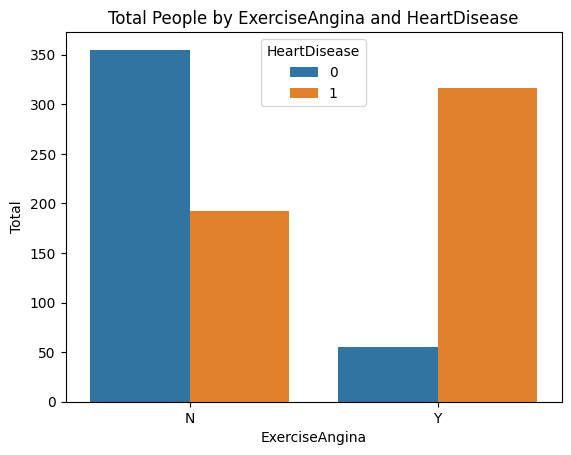

In [17]:
df_agina_heart = df.groupby(['ExerciseAngina','HeartDisease'])['ExerciseAngina'].count().reset_index(name='Total')
sns.barplot(data=df_agina_heart,x='ExerciseAngina',y='Total',hue='HeartDisease')
plt.title('Total People by ExerciseAngina and HeartDisease');

In [18]:
px.histogram(data_frame=df,x='Oldpeak',color='HeartDisease').update_layout(title='Oldpeak Distribution')

In [19]:
px.pie(values=df['HeartDisease'].value_counts(),names={ 0 : 'No Heart Disease',1:'Have Heart Disease'}).update_layout(title= 'HeartDisease')

In [21]:
def plot_age_with_x(x):
    fig = px.scatter(df,x=x,y='Age',color='HeartDisease')
    fig.update_layout(title= f'Age vs {x}')
    fig.show()

plot_age_with_x('Cholesterol')
plot_age_with_x('RestingBP')
plot_age_with_x('MaxHR')
plot_age_with_x('Oldpeak')

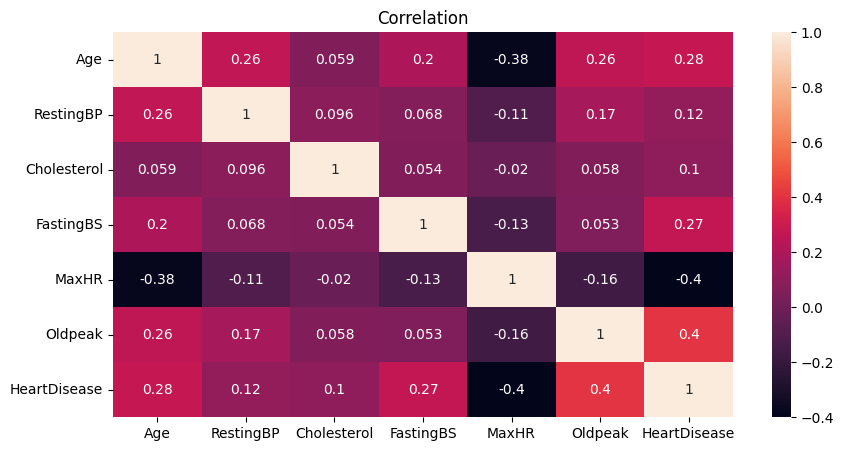

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.title('Correlation');

Data Preprocessing

In [23]:
df.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [24]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [25]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Filling Missing Data

In [26]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,[3,4]] = imp.fit_transform(X[:,[3,4]])

Encoding the categorical data

In [27]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [1,2,6,8,10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Split the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Applying Standardization on the data

In [29]:
sc = StandardScaler()
X_train[:, [9,10,11,13,14]] = sc.fit_transform(X_train[:, [9,10,11,13,14]])
X_test[:, [9,10,11,13,14]] = sc.transform(X_test[:, [9,10,11,13,14]])

Classification Model : Random Forest

Training the model

In [30]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

Evaluate the model

Accuracy =  88.59  %


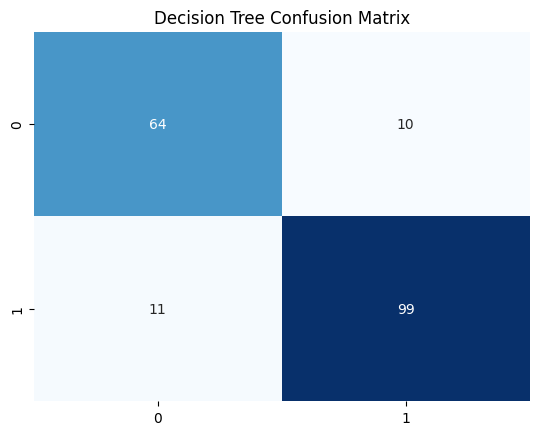

In [31]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix');